# Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('bank_fraud.zip')

# Obseriving the dataset

In [ ]:
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0


In [ ]:
df.shape

(594643, 10)

checking for null values

In [ ]:
df.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   step      594643 non-null  int64  
 1   customer  594643 non-null  object 
 2   age       594643 non-null  object 
 3   gender    594643 non-null  object 
 4   merchant  594643 non-null  object 
 5   category  594643 non-null  object 
 6   amount    594643 non-null  float64
 7   fraud     594643 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 36.3+ MB


In [ ]:
df.isnull().sum()
# number of null values

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [ ]:
df.customer.value_counts()
# number of customers

'C1978250683'    265
'C1275518867'    252
'C806399525'     237
'C515668508'     205
'C1338396147'    195
                ... 
'C1345586046'      6
'C1156745710'      6
'C1809646275'      5
'C1743702978'      5
'C1404665203'      5
Name: customer, Length: 4112, dtype: int64

In [ ]:
df.merchant.value_counts()

In [ ]:
df.age.value_counts()
# number of frauds per age group

'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: age, dtype: int64

# Exploratory Data Analysis

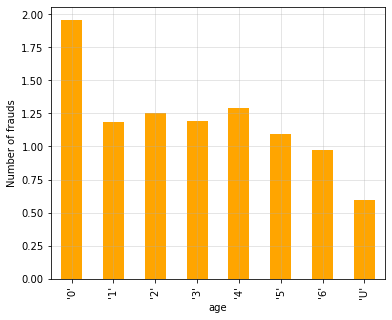

In [ ]:
plt.figure(figsize = (6,5))
plt.xlabel('AGE')
plt.ylabel('Number of frauds')
plt.grid(True, alpha =0.4)
plt.colormaps()
(df.groupby('age')['fraud'].mean()*100).plot(kind='bar',grid=True, color='orange')
# plotting the bar plot with appropriate parameters

The mean within each age category

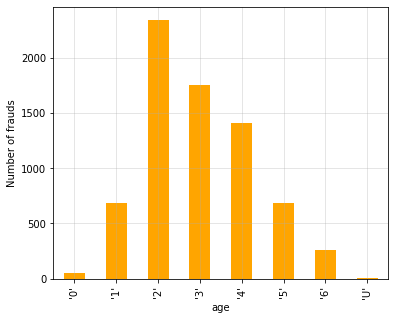

In [ ]:
plt.figure(figsize = (6,5))
plt.xlabel('AGE')
plt.ylabel('Number of frauds')
plt.grid(True, alpha =0.4)
plt.colormaps()
(df.groupby('age')['fraud'].sum()).plot(kind='bar',grid=True, color='orange')
# plotting the bar plot with appropriate parameters

The number of frauds that occur in each age

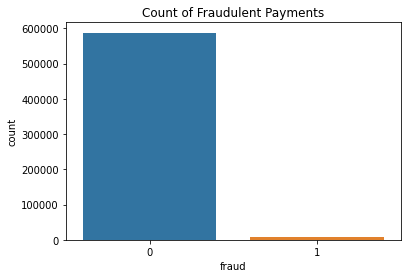

In [ ]:
sns.countplot(x="fraud",data=df)
plt.title("Count of Fraudulent Payments")
plt.show()


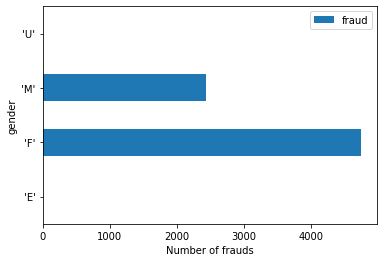

In [ ]:
plt.xlabel('Number of frauds')
df.groupby('gender')['fraud'].sum().plot(kind = 'barh',legend = True)

Theres a genger called 'U' (unknown). Since it has no business for analysis, it should be dropped.

Lets check the distribution for the amount spend for both fraud and not fraud.

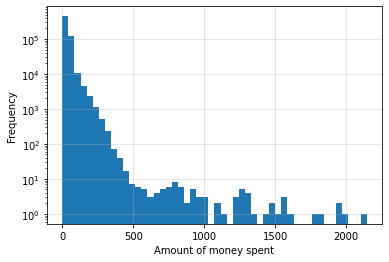

In [ ]:
# plot of histogram (frequency)
plt.figure()
plt.grid(True, alpha=0.4)
plt.xlabel('Amount of money spent')
plt.ylabel('Frequency')

plt.hist(df.amount[df['fraud'] ==0], bins= 50,log=True)
# plt.plot(df.amount[df['fraud'] ==0].value_counts())
plt.show()
# sns.kdeplot(df.amount[df['fraud'] ==0],shade=True)


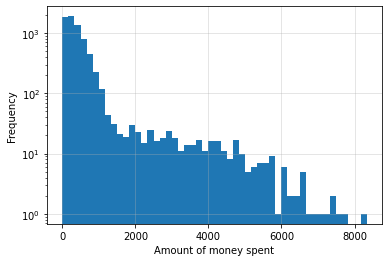

In [ ]:
# code for the histogram
plt.figure()
plt.grid(True, alpha=0.4)
plt.xlabel('Amount of money spent')
plt.ylabel('Frequency')

plt.hist(df.amount[df['fraud'] ==1], bins= 50,log= True)
# plt.plot(df.amount[df['fraud'] ==1].value_counts())
plt.show()
# sns.kdeplot(df.amount[df['fraud'] ==1],shade=True)


This shows that high amount of transactions happen in case of frauds, as clearly evident by the histogram.

Frauds usually is carried out in the name of luxury expenses in order to cover up high amount of money transaction, lets check this particular hypothesis.

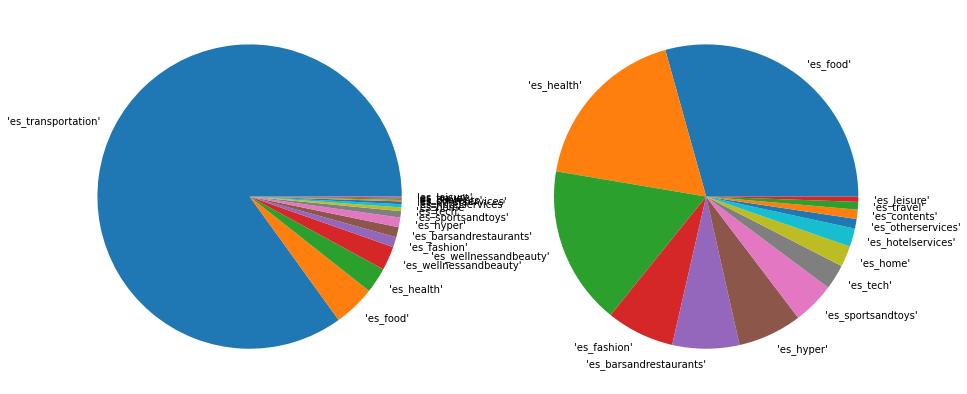

In [ ]:
# plt.figure(figsize=(10,10))
fig, ax = plt.subplots(1,2,figsize=(15,15))
plt.title('')
plt.grid(True)
ax[0].pie(df.category.value_counts(), labels= df.category.value_counts().keys())
ax[1].pie(df.category.value_counts()[1:], labels= df.category.value_counts().keys()[1:])
plt.show()

# pie charts in subplots for extreme and normal case 

It seems like the transportation or travelling option contains the highest amount of transactions. <br>
the pie plot on the right is after removing the 'transportation' category

checking the amount spent on each category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


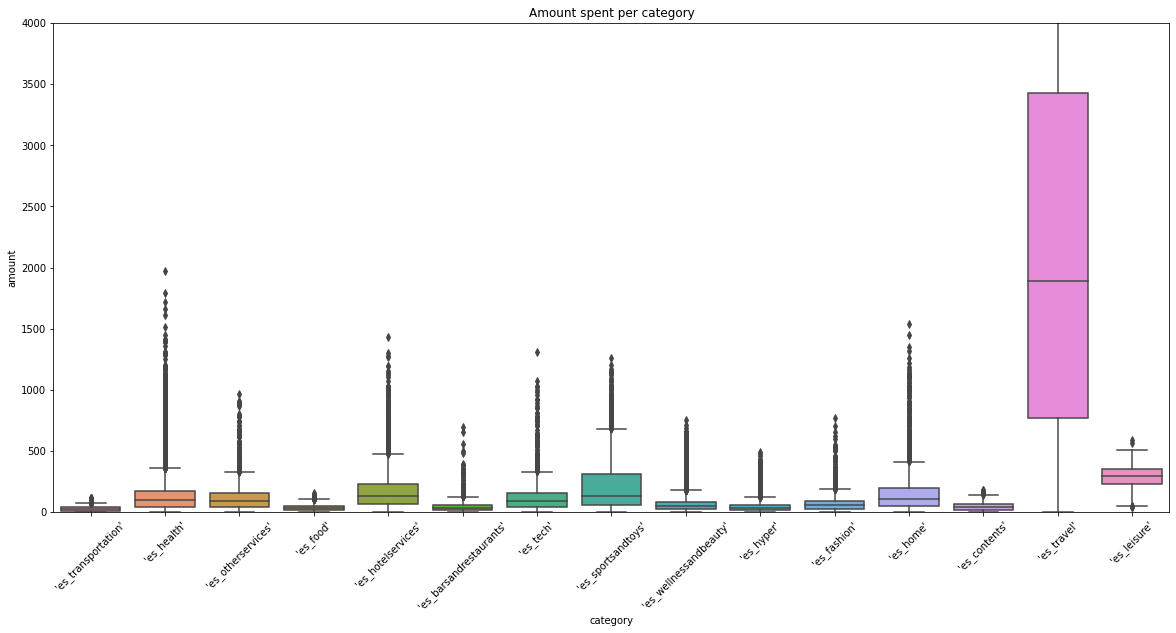

In [ ]:
plt.figure(figsize=(20,9))
plt.title('Amount spent per category')

# plotting a boxplot
plt.xticks(rotation=45)
sns.boxplot(df.category, df.amount)
plt.ylim(0,4000)

plt.show()

Travelling is the most highly purchased 'service' in the simulation.

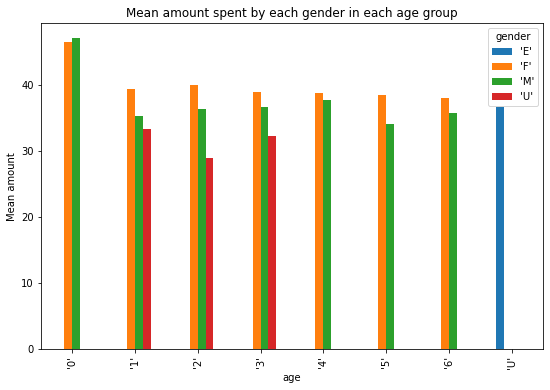

In [ ]:

df.groupby(['age','gender'])['amount'].mean().unstack().plot(
    kind='bar',figsize=(9,6),
    title='Mean amount spent by each gender in each age group',ylabel='Mean amount')

This graph shows the mean amount spent by each gender in each age group

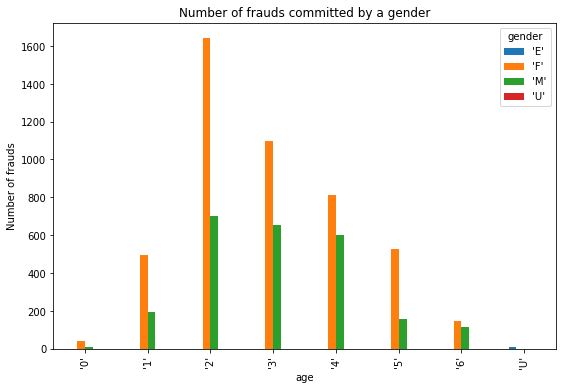

In [ ]:
df.groupby(['age','gender'])['fraud'].sum().unstack().plot(
    kind='bar', figsize=(9,6),
    title='Number of frauds committed by a gender',
    ylabel='Number of frauds')

This graph shows the number of fraud by a particular gender.

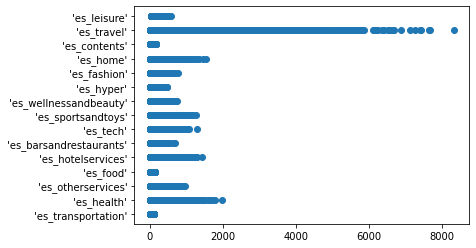

In [ ]:
plt.scatter(df.amount, df.category)

In [ ]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
male_df = df[df['gender']=="'M'"]


segragating the genders

In [ ]:
fmale_df = df[df['gender']=="'F'"]

In [ ]:
df.category.unique()
# all the categories to spend on

array(["'es_transportation'", "'es_health'", "'es_otherservices'",
       "'es_food'", "'es_hotelservices'", "'es_barsandrestaurants'",
       "'es_tech'", "'es_sportsandtoys'", "'es_wellnessandbeauty'",
       "'es_hyper'", "'es_fashion'", "'es_home'", "'es_contents'",
       "'es_travel'", "'es_leisure'"], dtype=object)

In [ ]:
labels = df.category.unique()
men_means = []
women_means = []
# empty lists to store the mean value of each category
for i in labels:
  men_means.append(male_df.amount[df.category==i].mean())
  women_means.append(fmale_df.amount[df.category==i].mean())
  # appending the mean values in the list with respect to the category


<BarContainer object of 15 artists>

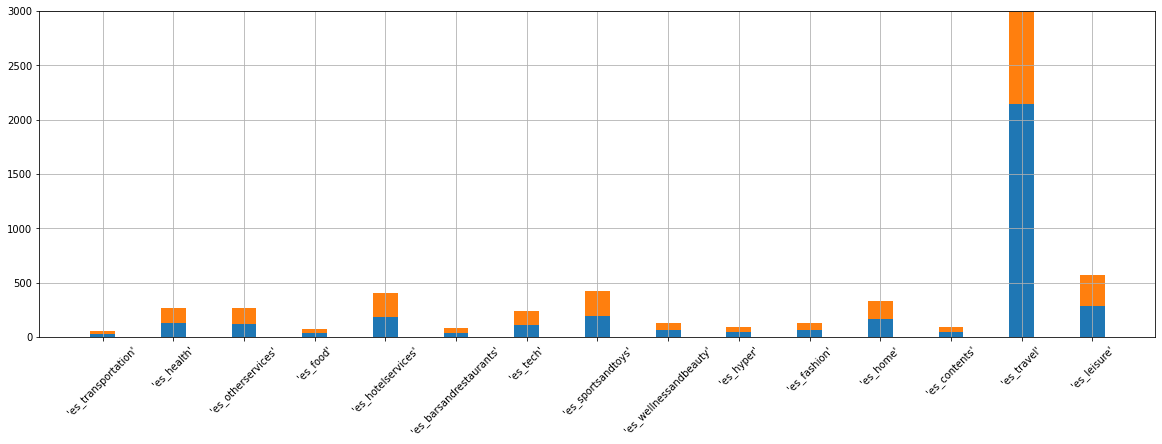

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
width = 0.35
plt.ylim(0,3000)
plt.xticks(rotation= 45)
#rotating the x labels to increase readability
plt.grid(True)
ax.bar(labels, men_means, width, label='Men')
ax.bar(labels, women_means, width,  bottom=men_means, label='Women')


This graph portrays the mean amount of money spent by the female and male genders on different categories

filled histogram

In [ ]:

# def filled_hist(ax, edges, values, bottoms=None, orientation='v',
#                 **kwargs):
#     """
#     Draw a histogram as a stepped patch.

#     Extra kwargs are passed through to `fill_between`

#     Parameters
#     ----------
#     ax : Axes
#         The axes to plot to

#     edges : array
#         A length n+1 array giving the left edges of each bin and the
#         right edge of the last bin.

#     values : array
#         A length n array of bin counts or values

#     bottoms : float or array, optional
#         A length n array of the bottom of the bars.  If None, zero is used.

#     orientation : {'v', 'h'}
#        Orientation of the histogram.  'v' (default) has
#        the bars increasing in the positive y-direction.

#     Returns
#     -------
#     ret : PolyCollection
#         Artist added to the Axes
#     """
#     print(orientation)
#     if orientation not in 'hv':
#         raise ValueError("orientation must be in {{'h', 'v'}} "
#                          "not {o}".format(o=orientation))

#     kwargs.setdefault('step', 'post')
#     edges = np.asarray(edges)
#     values = np.asarray(values)
#     if len(edges) - 1 != len(values):
#         raise ValueError('Must provide one more bin edge than value not: '
#                          'len(edges): {lb} len(values): {lv}'.format(
#                              lb=len(edges), lv=len(values)))

#     if bottoms is None:
#         bottoms = 0
#     bottoms = np.broadcast_to(bottoms, values.shape)

#     values = np.append(values, values[-1])
#     bottoms = np.append(bottoms, bottoms[-1])
#     if orientation == 'h':
#         return ax.fill_betweenx(edges, values, bottoms,
#                                 **kwargs)
#     elif orientation == 'v':
#         return ax.fill_between(edges, values, bottoms,
#                                **kwargs)
#     else:
#         raise AssertionError("you should never be here")


In [ ]:
high = df[df['amount']>=250]
low = df[df['amount']<250]

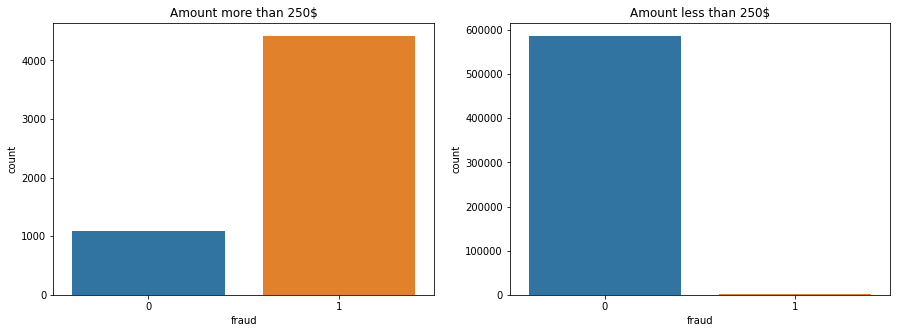

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

ax[0].set_title('Amount more than 250$')
sns.countplot(x=high.fraud, ax=ax[0])
ax[1].set_title('Amount less than 250$')
sns.countplot(x=low.fraud, ax= ax[1])

This clearly shows that the fraud transactions are not a joke and the cons are only after a big sum of money

# Preprocessing the data

First of all, the removal of zipcodes is necessary since the model won't learn anything from it. 

In [ ]:
df.drop(['zipcodeOri','zipMerchant'],1 ,inplace=True)
#dropping the zip codes column

In [ ]:
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0


In [ ]:
# pd.crosstab(df.customer,df.merchant).sum()

## Side vis for inference

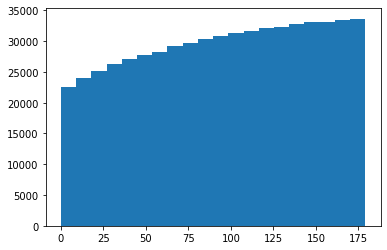

In [ ]:
plt.hist(df.step, bins=20)
plt.show()

In [ ]:
df.amount[df['fraud']==1].sum()

3822671.1700000004

In [ ]:
df.amount[df['fraud']==0].sum()

18708432.559999995

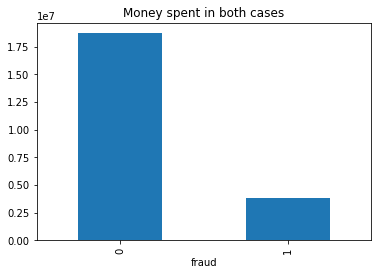

In [ ]:
df.groupby('fraud')['amount'].sum().plot(kind='bar',title='Money spent in both cases')

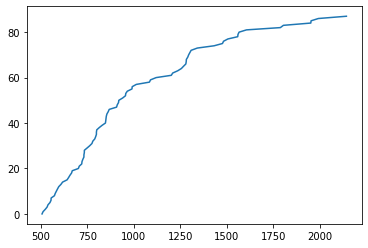

In [ ]:
plt.plot(df['amount'][(df['fraud']==0) & (df['amount']>500)].sort_values().values, 
         range(len(df['amount'][(df['fraud']==0) & (df['amount']>500)].sort_values().values)))

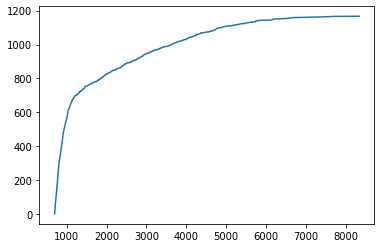

In [ ]:
plt.plot(df['amount'][(df['fraud']==1) & (df['amount']>700)].sort_values().values, 
         range(len(df['amount'][(df['fraud']==1) & (df['amount']>700)].sort_values().values)))

## Splitting the data for training and testing

In [ ]:
X= df.drop('fraud',1)
y=df['fraud']

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split as tts

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train, X_test, y_train, y_test = tts(X,y, 
                                       test_size = .2,
                                       random_state= 42,
                                       stratify = y)
# splitting the data into train and test sets

In [ ]:
num = list(X_train.select_dtypes(include='number'))
ss = StandardScaler()
for i in num:
  X_train[[i]]= ss.fit_transform(X_train[[i]])
  X_test[[i]]= ss.transform(X_test[[i]])

In [ ]:
# label encoding the categorical variables
cat_train = X_train.select_dtypes(exclude='number')
cat_test = X_test.select_dtypes(exclude='number')

# also fitting train set before transforming test set 
# to avoid data leakage

le = LabelEncoder()
for i in list(cat_train):
  X_train[i] = le.fit_transform(X_train[i])
  X_test[i] = le.transform(X_test[i])


In [ ]:
X_train

,step,customer,age,gender,merchant,category,amount
296209,97,2199,2,1,18,12,19.01
329958,107,217,2,1,30,12,26.98
394447,125,1344,2,1,18,12,22.60
588673,178,615,5,1,30,12,7.25
139286,49,2998,3,1,18,12,18.42
...,...,...,...,...,...,...,...
52982,20,1674,2,1,30,12,11.56
219940,74,154,4,1,45,3,27.88
20419,8,977,3,2,18,12,31.59
497957,153,2539,6,2,45,3,3.77


# Model building
importing the necessary model related and evaluation libraries together

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, roc_auc_score,roc_curve,auc

## Logistic regression

###Code

In [ ]:
logi = LogisticRegression(penalty='elasticnet',
                          class_weight='balanced',n_jobs=-1,
                          solver='saga',l1_ratio=0.5)

logi.fit(X_train,y_train)

y_pred = logi.predict(X_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


              precision    recall  f1-score   support

           0       1.00      0.94      0.97    117489
           1       0.15      0.87      0.26      1440

    accuracy                           0.94    118929
   macro avg       0.57      0.91      0.61    118929
weighted avg       0.99      0.94      0.96    118929



In [ ]:
print(accuracy_score(y_test, y_pred))

0.9386776984587443


### Accuracy evaluation

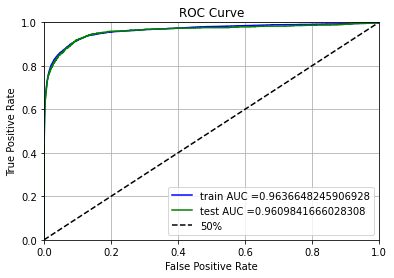

In [ ]:
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_score= logi.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, logi.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)),color='blue')
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)), color='green')
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1],'k--', label = "50%")
plt.legend()

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

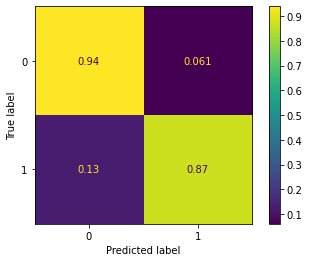

In [ ]:
 plot_confusion_matrix(logi, X_test, y_test, normalize = 'true')

## Random forest (simple)

In [ ]:
rf = RandomForestClassifier(n_estimators= 10)

rf.fit(X_train, y_train)

preds = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, preds))
print(accuracy_score(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117489
           1       0.89      0.72      0.80      1440

    accuracy                           1.00    118929
   macro avg       0.94      0.86      0.90    118929
weighted avg       1.00      1.00      1.00    118929

0.9955519679808962


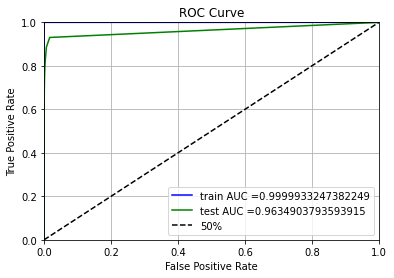

In [ ]:
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_score= rf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)),color='blue')
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)), color='green')
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1],'k--', label = "50%")
plt.legend()

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

## Random Forest (hyper tuned)


### Code

In [ ]:
# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 6)]
n_estimators = [100, 500, 1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(5, 30, 5)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# to tackle imbalance of classes
classweight=['balanced']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': classweight}

pprint(random_grid)

{'bootstrap': [True, False],
 'class_weight': ['balanced'],
 'max_depth': [5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 500, 1000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 50,cv=2,
                               verbose=2,
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 134.9min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_estimator_
#choosing the best estimator from the tuned ones

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=25, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_random.best_params_
# fetching the best parameters for random forest

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
random_forest = rf_random.best_estimator_

random_forest.fit(X_train, y_train)

preds = random_forest.predict(X_test)

# fitting the best model

### Accuracy evaluation

In [ ]:
print(classification_report(y_test, preds))
print(accuracy_score(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117489
           1       0.85      0.76      0.81      1440

    accuracy                           1.00    118929
   macro avg       0.92      0.88      0.90    118929
weighted avg       1.00      1.00      1.00    118929

0.9955267428465723


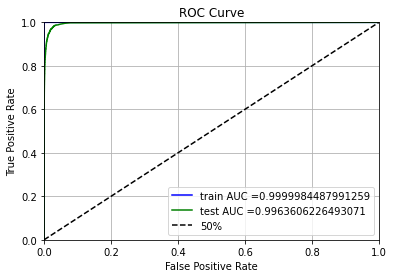

In [ ]:
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_score= random_forest.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)),color='blue')
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)), color='green')
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1],'k--', label = "50%")
plt.legend()

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

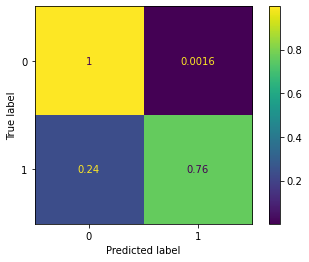

In [ ]:
plot_confusion_matrix(random_forest, X_test, y_test, normalize = 'true')

In [ ]:
cols = list(X_train)
imp_score = random_forest.feature_importances_

imp_features = pd.DataFrame({'Feature name':cols, 
                            'Importance score': imp_score}).sort_values(by = 'Importance score', ascending = False)

In [ ]:
imp_features

,Feature name,Importance score
6,amount,0.397183
5,category,0.335176
4,merchant,0.215416
1,customer,0.021501
0,step,0.018509
2,age,0.007767
3,gender,0.004448


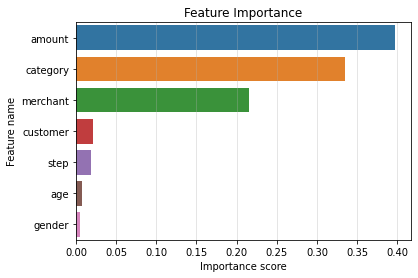

In [ ]:
plt.figure()
plt.title("Feature Importance")
plt.grid('True', alpha = 0.4)
sns.barplot(x=imp_features['Importance score'],y= imp_features['Feature name'])

In [ ]:
probas_rf = random_forest.predict_proba(X_test)

In [ ]:
heat = pd.DataFrame({'amount':X_test['amount'],
                     'probas for fraud':probas_rf[:,1], 
                     'probas for not':probas_rf[:,0] })

In [ ]:
heat= heat.sample(500)
heat = heat.sort_values(by='amount')

In [ ]:
heat.reset_index(drop=True, inplace=True)

In [ ]:
heat

,amount,probas for fraud,probas for not
0,0.03,0.000000,1.000000
1,0.19,0.000000,1.000000
2,0.33,0.000000,1.000000
3,0.41,0.000000,1.000000
4,0.52,0.000000,1.000000
...,...,...,...
495,179.14,0.824755,0.175245
496,181.09,0.697734,0.302266
497,271.10,0.955956,0.044044
498,298.97,0.914970,0.085030


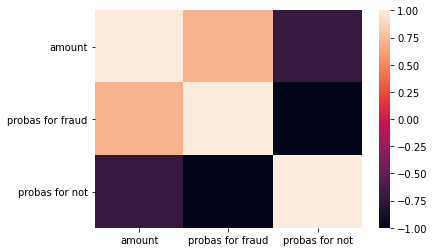

In [ ]:
sns.heatmap(heat.corr() , vmin=-1, vmax=1)

best model yet

# Reduction and visualisations

Let us observe the data and visualzie it through principal components. 

In [ ]:
from sklearn.decomposition import PCA

pca= PCA(n_components = 2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


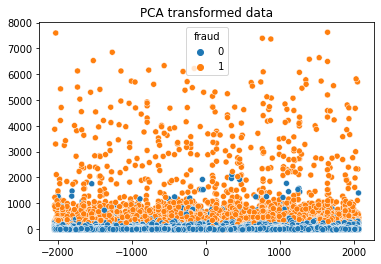

In [ ]:
plt.figure()
plt.title('PCA transformed data')
sns.scatterplot(X_train_pca[:,0], X_train_pca[:,1], hue = y_train)

## Other experiments with differnet models

## XGB classifier

In [ ]:
xgb = XGBClassifier(n_jobs=-1,learning_rate=0.1)

xgb.fit(X_train, y_train)

preds = xgb.predict(X_test)


In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117489
           1       0.89      0.72      0.79      1440

    accuracy                           1.00    118929
   macro avg       0.94      0.86      0.90    118929
weighted avg       1.00      1.00      1.00    118929



In [ ]:
print(accuracy_score(y_test, preds))

0.9955015177122485


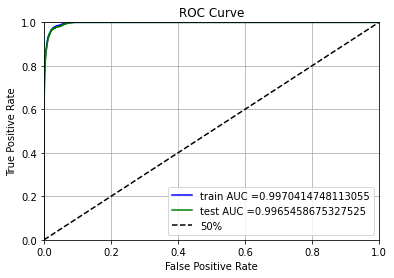

In [ ]:
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_score= xgb.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)),color='blue')
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)), color='green')
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1],'k--', label = "50%")
plt.legend()

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(25)

knn.fit(X_train, y_train)

preds = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    117489
           1       0.83      0.24      0.37      1440

    accuracy                           0.99    118929
   macro avg       0.91      0.62      0.68    118929
weighted avg       0.99      0.99      0.99    118929



In [ ]:
print(accuracy_score(y_test, preds))

0.9902042395042421


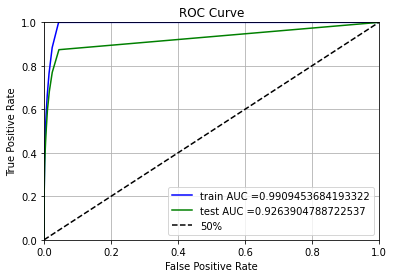

In [ ]:
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_score= knn.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)),color='blue')
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)), color='green')
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1],'k--', label = "50%")
plt.legend()

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [ ]:
thresholds[int(len(thresholds)/2-0.5)]

0.52

In [ ]:
Intro
  -aim and objectives

Literature review

Methodology
  -data background
  -data shape
  -preprocessing

EDA

results (model building stage)

conclusion and discussion 

references